# C001 - Hands on Machine Learning

# Chapter 1 - Fundamentals of ML

# Supervised Learning

k-Nearest Neighbors

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Scatterplot - Recovered from: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

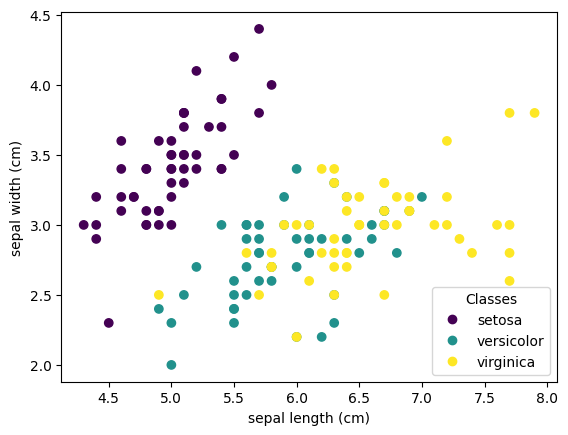

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)



*   Train dataset (60%)
*   Validation dataset (20%)
*   Test dataset (20%)




In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

k value (Find the optimal value of k for this context):

In [ ]:
k_range = list(range(1, 31))

In [ ]:
cv_scores = []

In [ ]:
from sklearn.model_selection import cross_val_score

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Optimal k

In [ ]:
optimal_k = k_range[cv_scores.index(max(cv_scores))]
print("Optimal k =", optimal_k)

Optimal k = 1


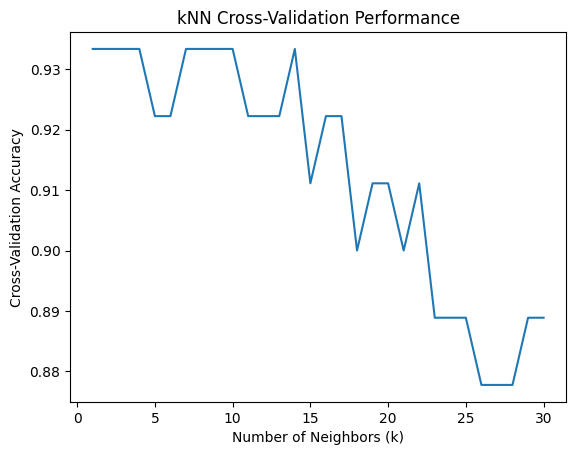

In [ ]:
plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('kNN Cross-Validation Performance')
plt.show()

The Iris Dataset is overfitting the kNN Algo.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Loss function => Accuracy

In [ ]:
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy with k =", optimal_k, ":", val_accuracy)

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy with k =", optimal_k, ":", test_accuracy)

Validation Accuracy with k = 1 : 1.0
Test Accuracy with k = 1 : 0.9666666666666667


Test KNN algo. with another dataset - Apple Quality Classification




In [ ]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Project 4/dataset/apple_quality.csv')

In [20]:
df.drop(df.tail(1).index, inplace=True)
df.drop(columns=['A_id'], inplace=True)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3991,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431320563,good
3992,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338260538,good
3993,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080106,bad
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229254586,good


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3996 non-null   float64
 1   Weight       3996 non-null   float64
 2   Sweetness    3996 non-null   float64
 3   Crunchiness  3996 non-null   float64
 4   Juiciness    3996 non-null   float64
 5   Ripeness     3996 non-null   float64
 6   Acidity      3996 non-null   object 
 7   Quality      3996 non-null   object 
dtypes: float64(6), object(2)
memory usage: 249.9+ KB


In [22]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
print(df['Acidity'].dtype)

float64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3996 non-null   float64
 1   Weight       3996 non-null   float64
 2   Sweetness    3996 non-null   float64
 3   Crunchiness  3996 non-null   float64
 4   Juiciness    3996 non-null   float64
 5   Ripeness     3996 non-null   float64
 6   Acidity      3996 non-null   float64
 7   Quality      3996 non-null   object 
dtypes: float64(7), object(1)
memory usage: 249.9+ KB


Scatterplot of Quality vs Size

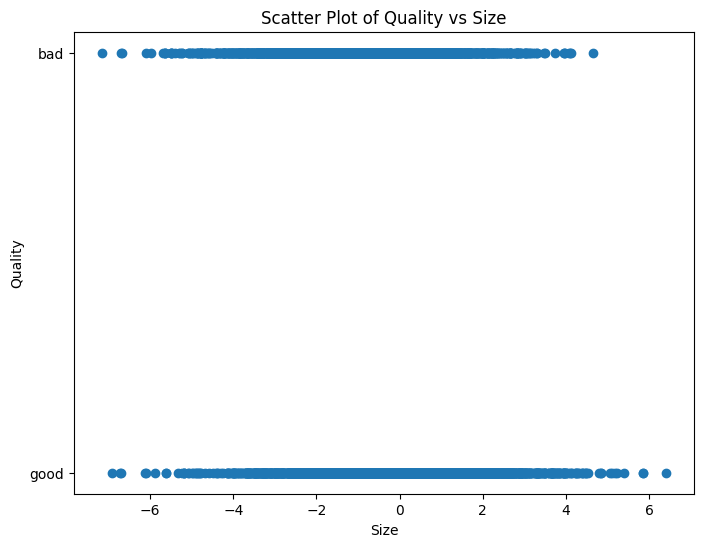

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Size'], df['Quality'])

plt.xlabel('Size')
plt.ylabel('Quality')
plt.title('Scatter Plot of Quality vs Size')

plt.show()

Define the Pipeline

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [36]:
df['Quality_encoded'] = label_encoder.fit_transform(df['Quality'])
df.groupby('Quality')['Quality_encoded'].unique().reset_index()

,Quality,Quality_encoded
0,bad,[0]
1,good,[1]


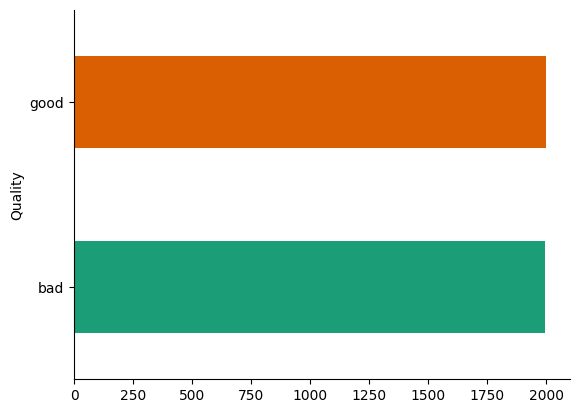

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
df.drop(columns=['Quality'], inplace=True)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_encoded
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3991,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431321,1
3992,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338261,1
3993,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080,0
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,1


In [44]:
X = df.drop("Quality_encoded", axis=1)
y = df["Quality_encoded"]

In [45]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

k value (Find the optimal value of k for this context):

In [46]:
k_range = list(range(1, 31))

In [47]:
cv_scores = []

In [48]:
from sklearn.model_selection import cross_val_score

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Optimal k

In [52]:
optimal_k = k_range[cv_scores.index(max(cv_scores))]
print("Optimal k =", optimal_k)

Optimal k = 7


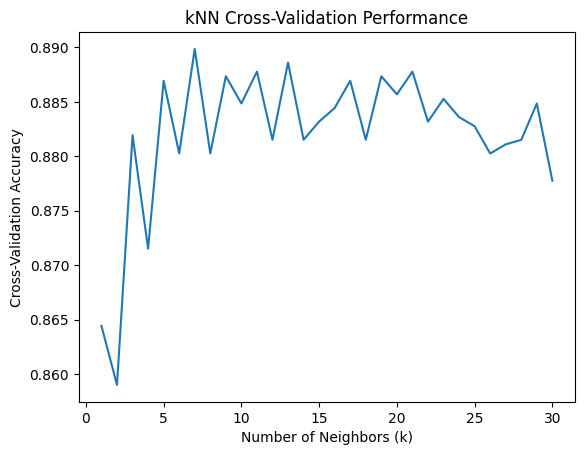

In [53]:
plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('kNN Cross-Validation Performance')
plt.show()

In [57]:
knn_apple_quality = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [58]:
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy with k =", optimal_k, ":", val_accuracy)

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy with k =", optimal_k, ":", test_accuracy)

Validation Accuracy with k = 7 : 0.8760951188986232
Test Accuracy with k = 7 : 0.88625


In [59]:
df_to_test = {
    "Size": 2.451215,
    "Weight": 3.672134,
    "Sweetness": 6.125521,
    "Crunchiness": 2.661234,
    "Juiciness": 3.512312,
    "Ripeness": 4.124552,
    "Acidity": 4.156312
}

df_test = pd.DataFrame([df_to_test])

In [63]:
final_prediction = knn.predict(df_test)
print(f"Final prediction: {final_prediction[0]}")

Final prediction: 1
